# GIL(global interpreter lock)

## 引入：线程与进程

In [ ]:
线程是操作系统进行计算和调度的一个最小单位，简单理解，我们的程序都是运行在线程里的。
进程是比线程更大的单位，每一个进程有自己的内存，一个进程可以有好几个线程，这些线程会共享进程拥有的内存，可以读写同样的变量。

In [ ]:
当一个进程不止一个线程时，会出现竞争冒险。因为一个进程中的若干线程，既有可能同时运行，也可能交替运行，没办法控制运行的相对顺序。

In [ ]:
# 例子
a = 1  #有两个线程，共享a这个变量 
if a>0:
    a -= 1  #运行顺序不同，结果不同（竞争冒险） 

c和c++里需要显式分配内存，如果光分配不释放，随着程度运行，占用的内存会越来越多。但在python里，不需要显式地分配跟释放内存，python解释器里的memory management会自动分配，尤其是释放内存的。这其中的机制就是“引用计数”。
在Python中创建的对象都会有引用计数，来记录有多少个指针指向它。当引用计数的值为0时，就会自动释放内存

In [2]:
import sys
a = []
b = a
sys.getrefcount(a)

3

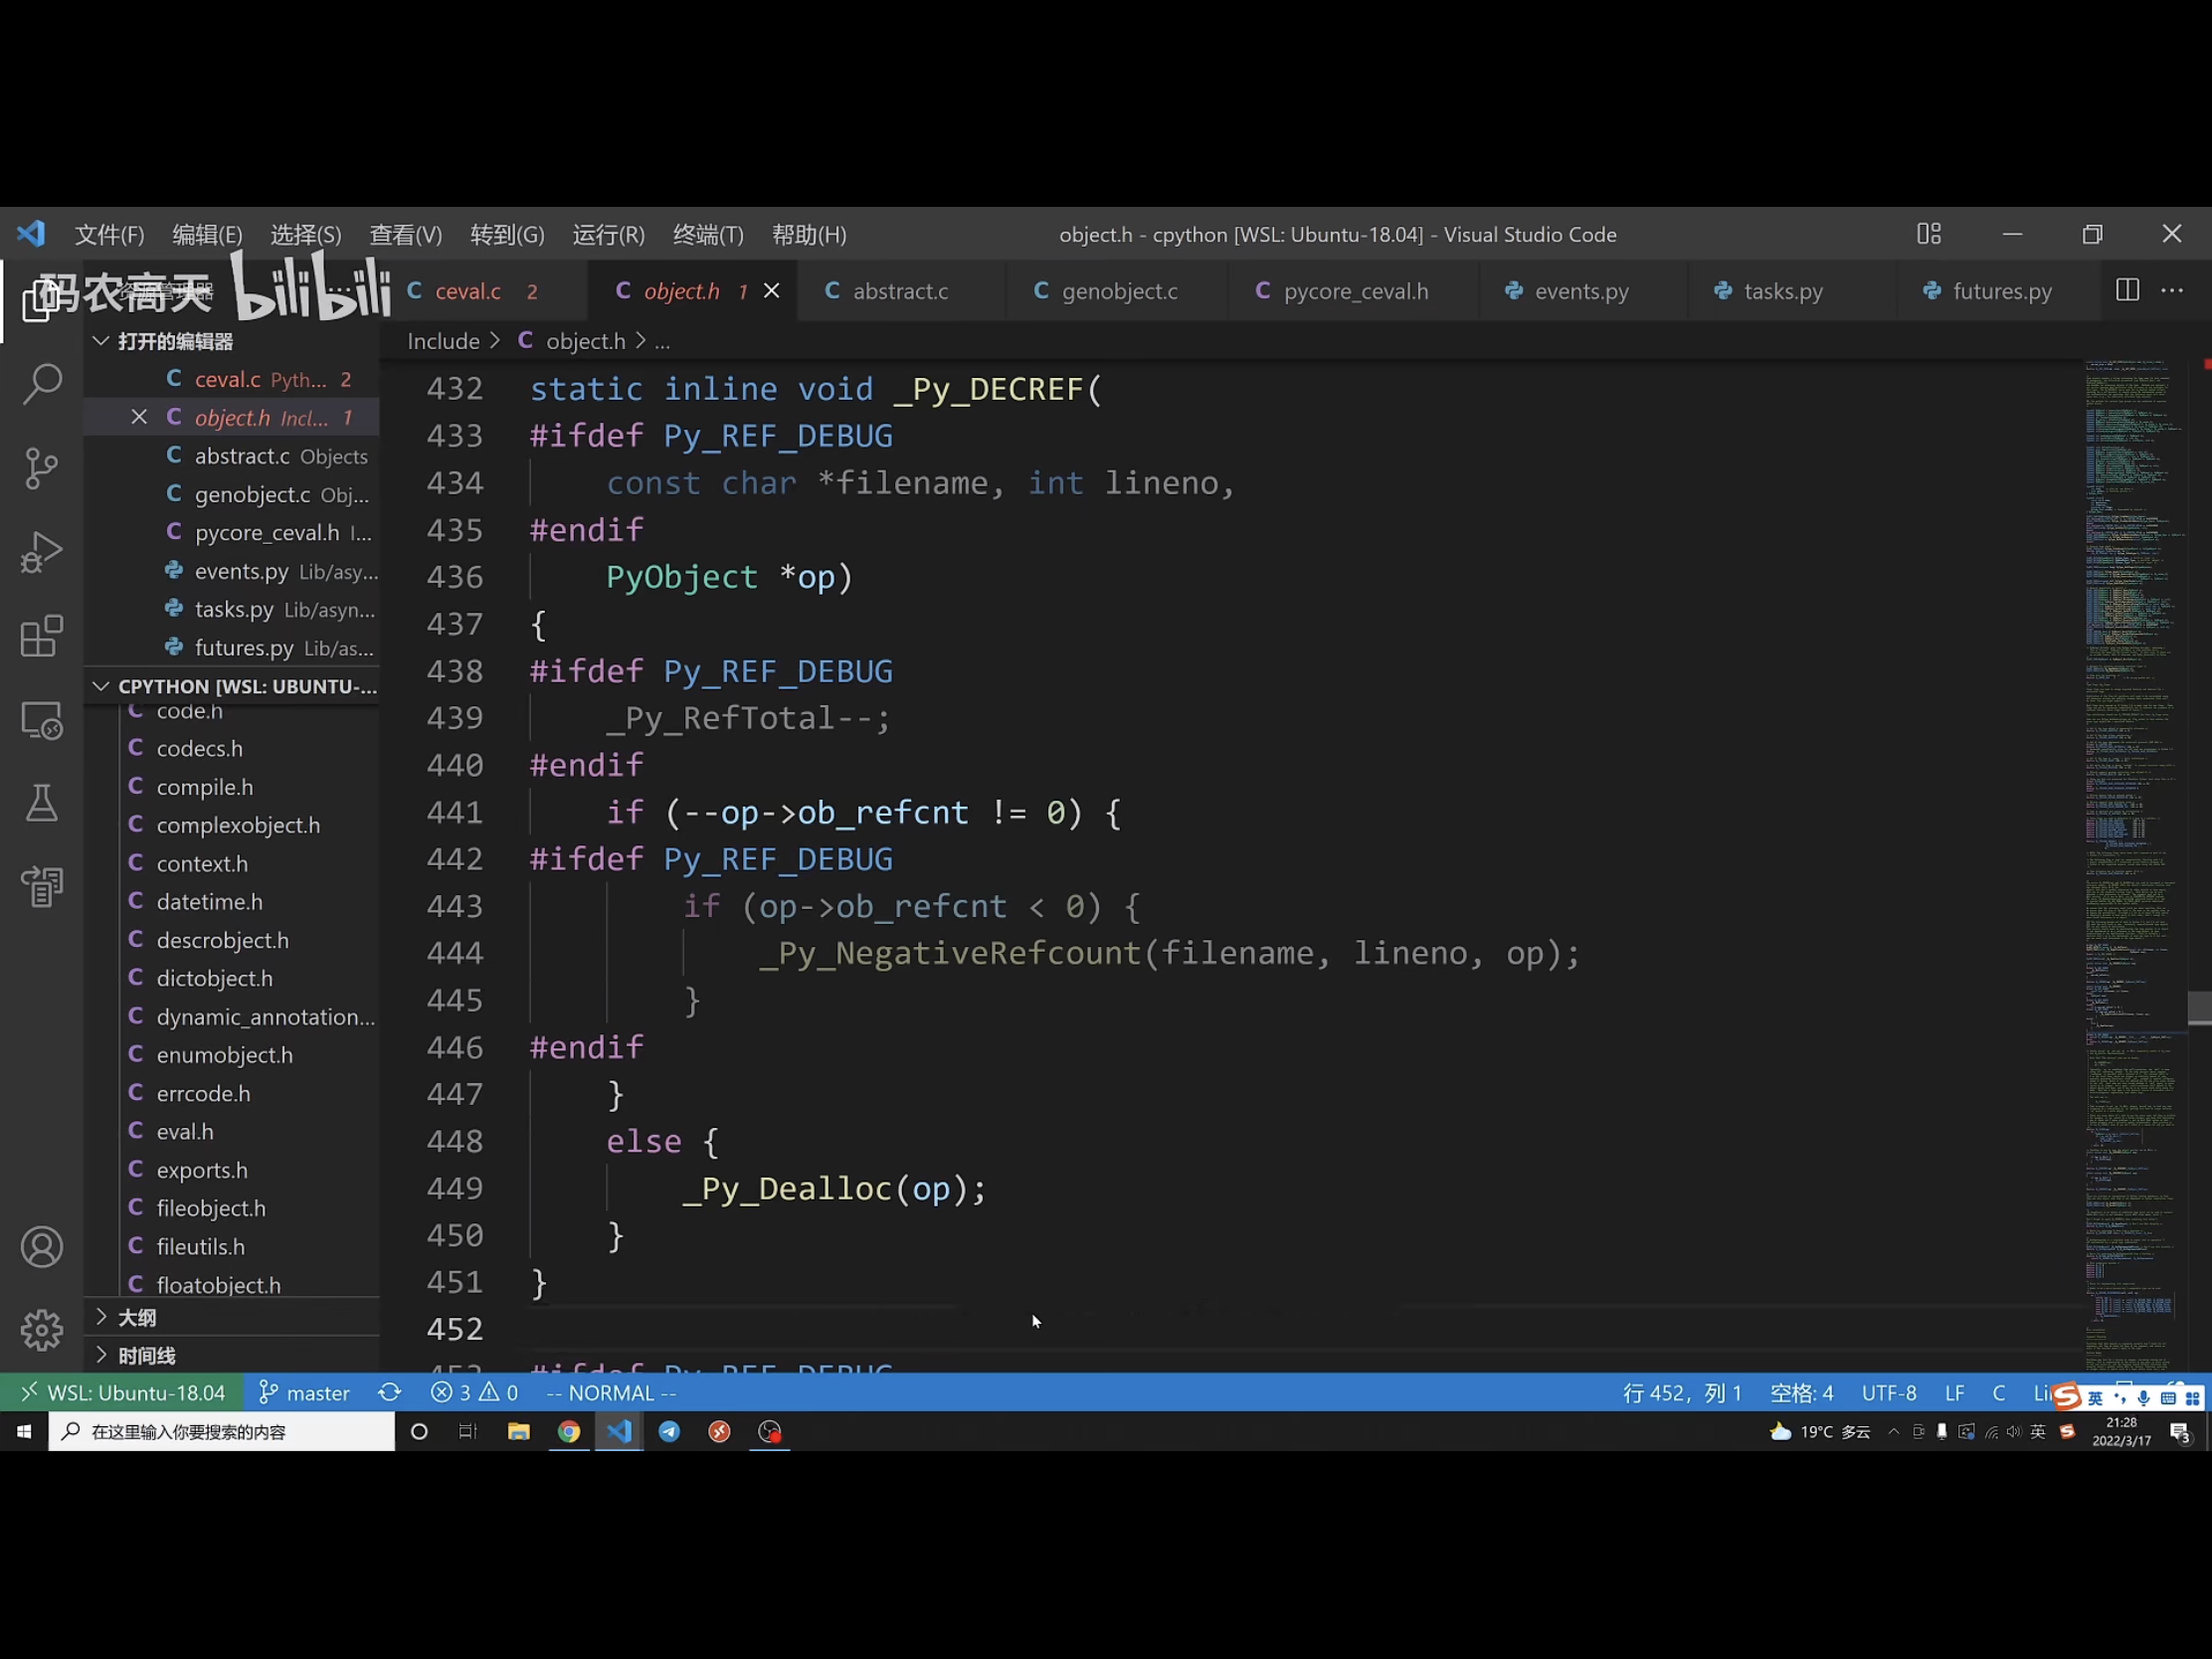

关键：计数准确，否则会导致内存泄漏。

## 1.GIL锁概念及影响

GIL（全局解释器锁），保证同一时间，只有一个线程使用CPU。
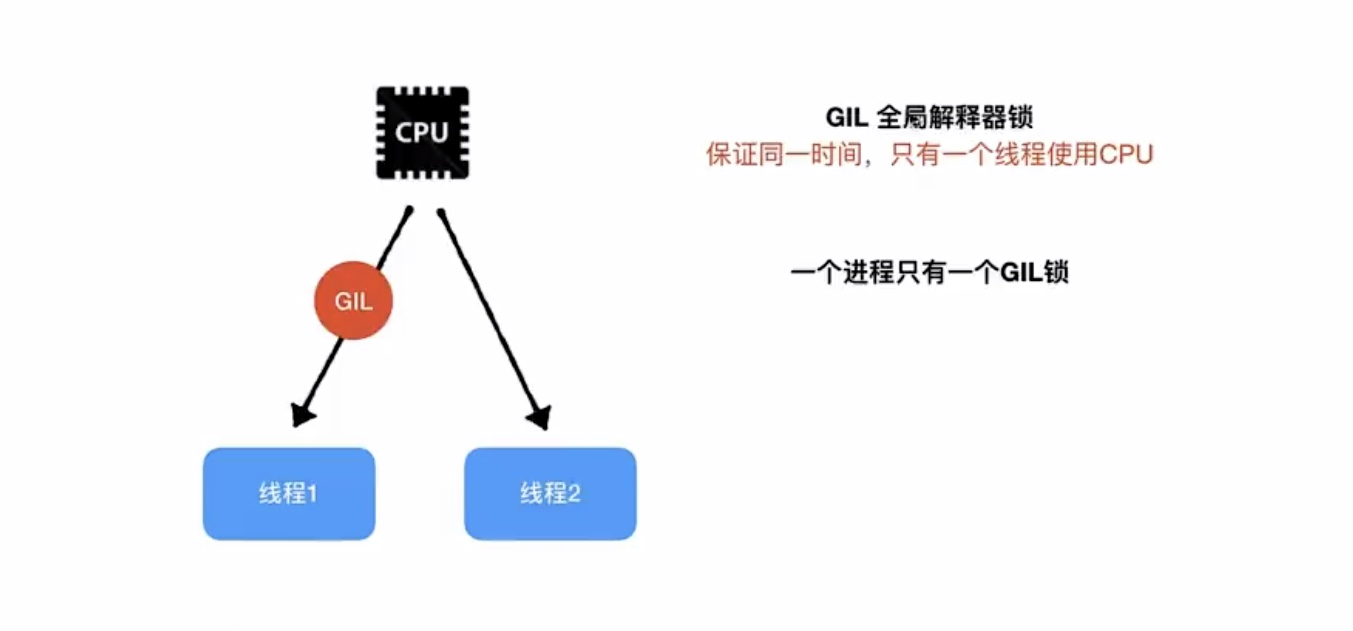

### 1.1 GIL锁定义

GIL锁，global interpreter lock，又称全局解释器锁。任何python线程执行前，必须先获得GIL锁，然后再去执行相应的代码，代码执行100行（举个例子），解释器自动释放GIL锁，让别的线程有机会执行。所以，CPU的资源永远只有一个核在使用，别的线程都在睡眠。  
以图中单进程为例：一个进程，只有一个解释器，也就只有一把锁。锁在几个线程中不停切换，竞争关系。
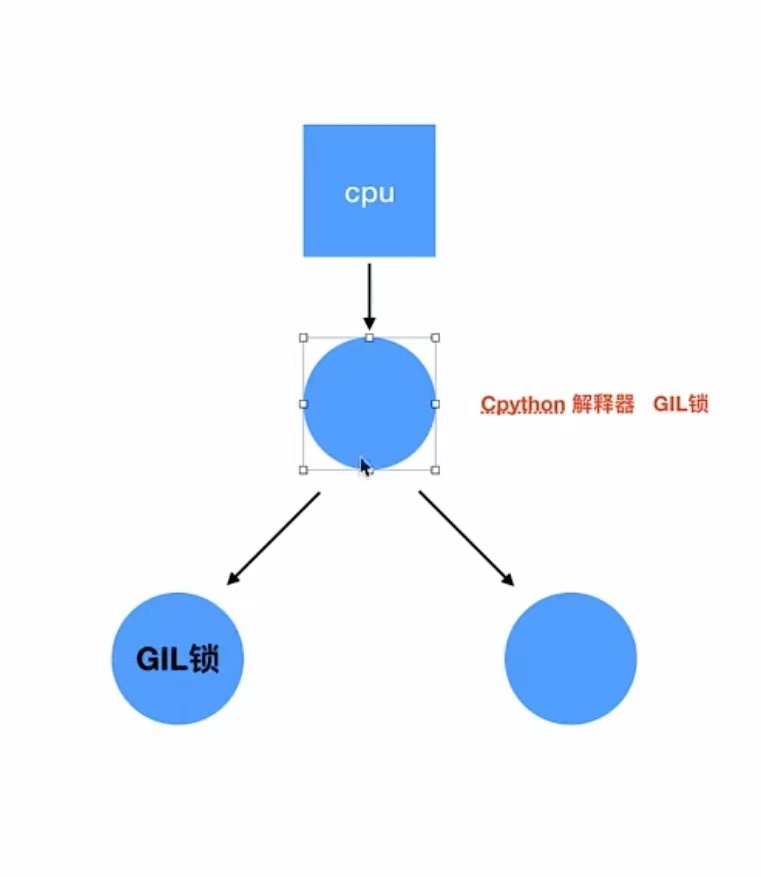

### 1.2 GIL不是python特性

GIL是python解释器（Cpython）时引入的概念，是解释器层级的锁，跟python语言特性无关。
可以改掉吗？解释器里的代码很大，锁的应用也很广。

### 1.3 GIL存在原因

- 早期计算机都是单核设计
- Cpython在执行多线程时并不是线程安全的，为了程序的稳定性，加一把GIL锁，确保任何时候都只有一个python线程在执行。

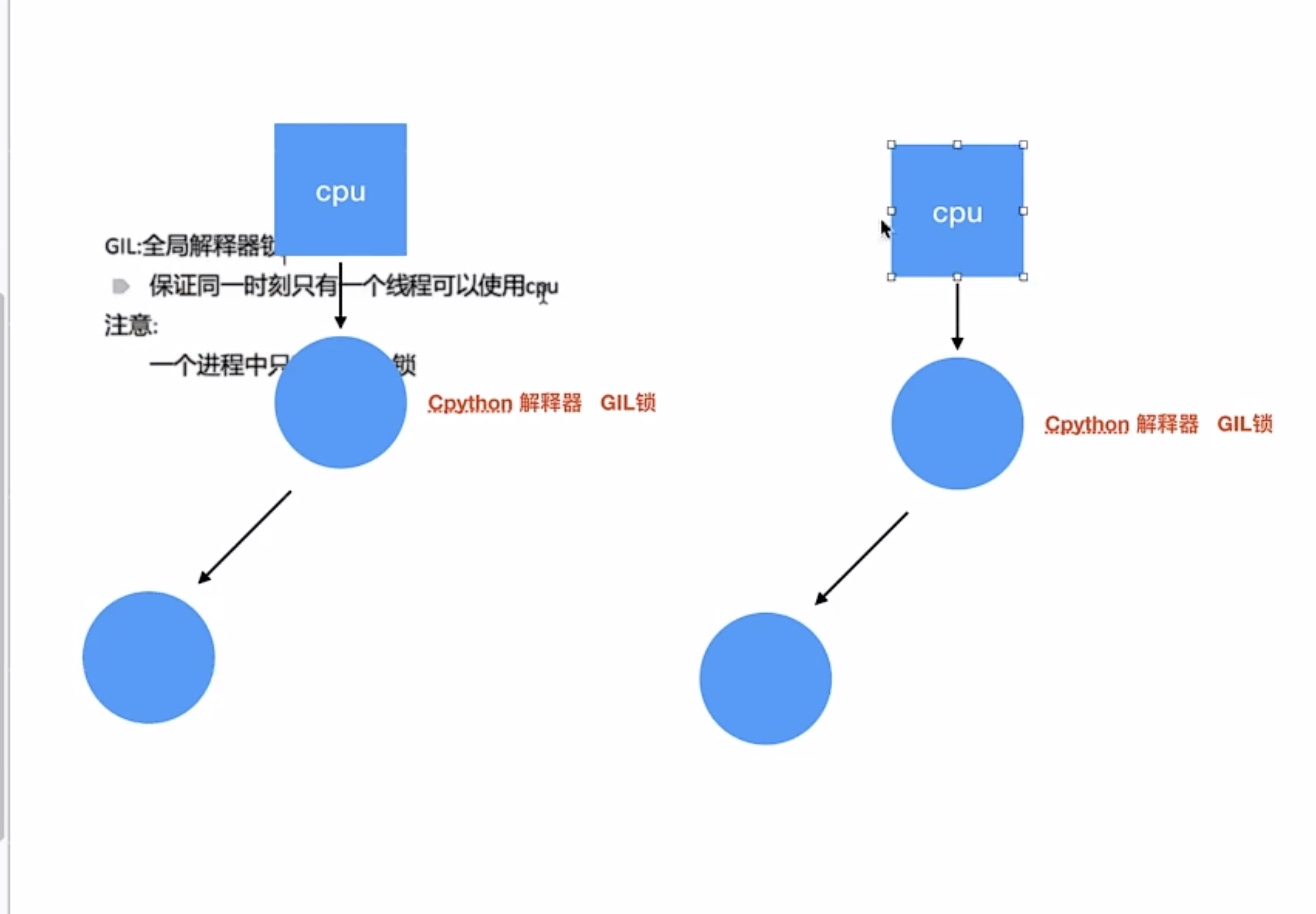

In [ ]:
可以改掉吗？解释器里的代码很大，锁的应用也很广。

### 1.4 GIL的弊端

- io密集型：input/output，程序的瓶颈在于输入所耗费的时间。适用多线程
- 计算密集型：由于CPU一直处于被占用状态，GIL锁直到规定时间才会释放，然后才会切换状态，导致多线程处于绝对的劣势，此时可以采用多进程+协程。
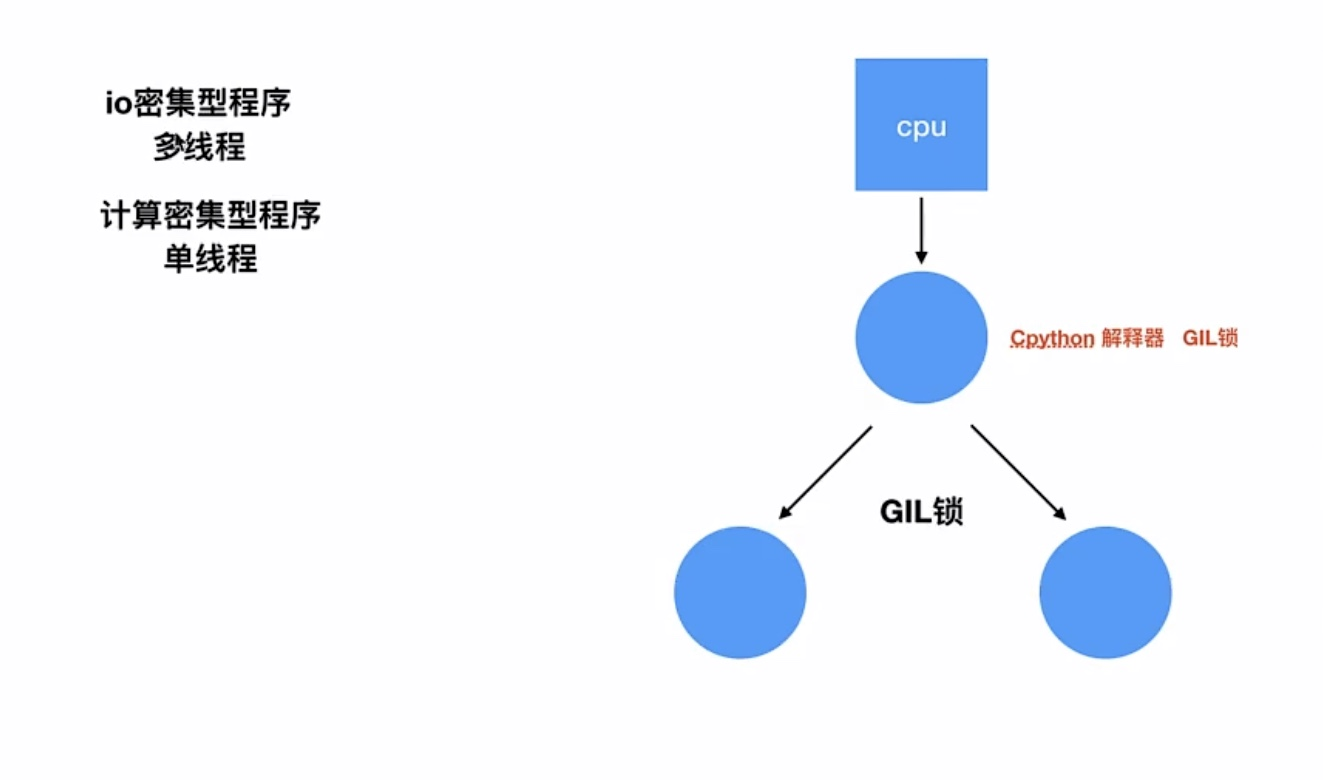

### 1.5 GIL锁什么时候释放？

- Time Tick规定了线程的最长执行时间，超过时间后自动释放GIL锁。Python 3 以后，间隔时间大致为15毫秒。
- 遇到IO操作，当前线程执行阻塞操作时，自动释放
- 当前执行完成时，自动释放

## 2.GIL锁面试题

描述python GIL的概念，以及它对python多线程的影响？编写一个多线程抓取网页的程序，并阐明多线程抓取程序是否比单线程性能有提升，并解释原因。

- （1）GIL锁，全局解释器锁。每个戏按成在执行过程都需要先获取GIL，保证同一时刻只有一个线程可以执行代码；让多线程变成伪的多线程。
- （2）读写，io密集型。多线程爬取比单线程性能有提升，因为遇到IO阻塞会自动释放GIL锁，别的线程就可以执行。